# <b>PyCaret Regression Example (main components)<b>
Last Update: 01/01/2023

PyCaret Version: 2.2.3

Author: [Aurimas Aleksandras Nausėdas](https://github.com/aurimas13)

# <b> Installation </b>

In [1]:
!pip install pycaret==2.2.3

In [2]:
# Check Version
from pycaret.utils import version
print('Confirm PyCaret version is 2.2.X?')
print('PyCaret Version: ', version())

Confirm PyCaret version is 2.2.X?
PyCaret Version:  2.2.3


# 1. <b>Loading Dataset<b>

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. <b>Initialize Setup<b>

In [4]:
# Import regression tools and setup an initiliziation
from pycaret.regression import *
reg1 = setup(data, target='charges', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


# 3. <b>Compare Baseline<b>

In [5]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.6062,23032272.0323,4796.0417,0.8391,0.4429,0.3133,0.5580
rf,Random Forest Regressor,2773.4915,25322439.6709,5029.5502,0.8218,0.4815,0.3436,0.0860
catboost,CatBoost Regressor,2853.7795,25475537.1518,5045.7888,0.8212,0.4823,0.3492,0.2180
lightgbm,Light Gradient Boosting Machine,3018.9895,25515012.2780,5049.8492,0.8192,0.5534,0.3876,0.0260
et,Extra Trees Regressor,2779.8348,28221038.4660,5302.5710,0.8039,0.4862,0.3265,0.0760
ada,AdaBoost Regressor,4366.1001,29298215.0099,5411.0606,0.7915,0.6478,0.7662,0.0120
xgboost,Extreme Gradient Boosting,3257.2767,31489404.4000,5610.5080,0.7774,0.5723,0.4072,0.0600
llar,Lasso Least Angle Regression,4326.7373,38523203.6644,6194.6391,0.7345,0.6004,0.4409,0.0080
lr,Linear Regression,4332.7662,38549952.4000,6197.0843,0.7343,0.6369,0.4415,0.7760
lasso,Lasso Regression,4332.6331,38543896.8000,6196.6073,0.7343,0.6404,0.4416,0.5600


# 4. <b>Create Model<b>

In [6]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.9328,24058897.6188,4904.9870,0.8563,0.6083,0.3985
1,3080.5341,29299757.4511,5412.9250,0.8296,0.4459,0.3268
2,3022.2314,27624562.3462,5255.9074,0.6502,0.6822,0.4361
3,3146.2421,25018957.3381,5001.8954,0.7911,0.6398,0.5095
4,3154.6899,28894513.1127,5375.3617,0.7851,0.5901,0.3617
5,2931.0896,21432485.9043,4629.5233,0.8621,0.4131,0.2829
6,2625.9358,20785815.6794,4559.1464,0.8586,0.3891,0.3070
7,2678.3617,24232738.8679,4922.6760,0.8668,0.5098,0.2720
8,2710.3380,21418666.0615,4628.0305,0.8617,0.5574,0.4101
9,3273.2286,29598376.0758,5440.4390,0.8094,0.5916,0.3804



In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [7]:
import numpy as np
lgbms = [create_model('lightgbm', learning_rate=i) for i in np.arange(0.1, 1, 0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4208.4914,37359346.2148,6112.2292,0.7769,0.6969,0.5903
1,4164.7621,38772692.6839,6226.7723,0.7746,0.6826,0.4917
2,4545.7489,45041923.2265,6711.3280,0.4297,0.9558,0.6772
3,4390.3369,41942309.5563,6476.2883,0.6498,0.7140,0.7225
4,4612.6274,41966536.7333,6478.1584,0.6879,0.6953,0.5762
5,4166.0224,34525506.1381,5875.8409,0.7779,0.6199,0.4641
6,3916.8457,31704831.4864,5630.7044,0.7843,0.7189,0.4801
7,3689.6088,32718648.7731,5720.0217,0.8201,0.6266,0.4303
8,3995.6685,35808315.7293,5984.0050,0.7687,0.9064,0.6267
9,4616.1772,47556279.2449,6896.1061,0.6937,0.8657,0.7124


In [8]:
len(lgbms)

9

# 5. <b>Tune Hyperparameters<b>

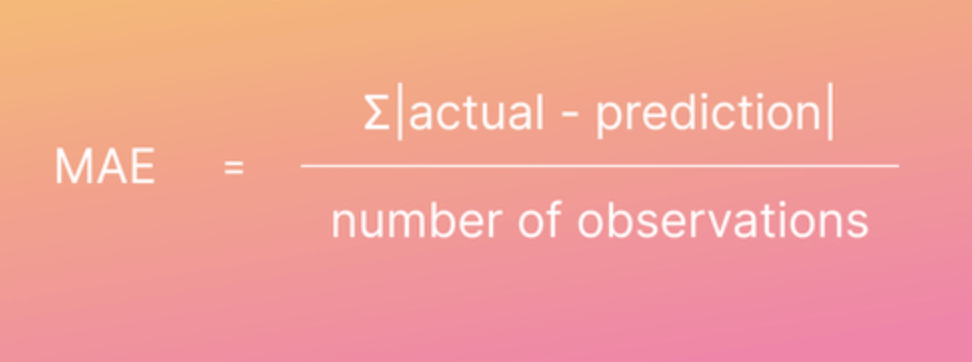

In [9]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2714.5960,20082330.5110,4481.3313,0.8801,0.4411,0.3227
1,3233.9862,30452696.2798,5518.3962,0.8229,0.4384,0.3285
2,2766.0996,23040274.6658,4800.0286,0.7083,0.5137,0.3772
3,2912.7110,21424774.1632,4628.6903,0.8211,0.4989,0.4006
4,2939.5090,27487022.0665,5242.8067,0.7956,0.5281,0.2782
5,2602.4025,18404080.3029,4289.9977,0.8816,0.3452,0.2547
6,2479.0161,18989864.9116,4357.7362,0.8708,0.4170,0.3010
7,2653.7925,24093380.4885,4908.5008,0.8675,0.4552,0.2600
8,2534.8309,19203456.1091,4382.1748,0.8760,0.4255,0.3494
9,2984.0451,26976573.0984,5193.8977,0.8262,0.4923,0.3430


In [10]:
tuned_lightgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.134, max_depth=-1,
              min_child_samples=45, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=70, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.1, reg_lambda=0.001, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. <b>Ensemble Model<b>

In [11]:
gbr = create_model('gbr')
# dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2726.1095,21572648.1936,4644.6365,0.8712,0.4412,0.3314
1,3043.4778,32135372.2318,5668.8069,0.8132,0.4592,0.2956
2,2554.0978,21324521.0857,4617.8481,0.7300,0.4760,0.3072
3,2830.5469,21785291.7575,4667.4717,0.8181,0.4471,0.3480
4,2888.2098,27291661.9275,5224.1422,0.7970,0.5195,0.3473
5,2522.7354,18721684.9052,4326.8562,0.8796,0.3360,0.2348
6,2489.0907,19867733.9313,4457.3236,0.8648,0.3574,0.2832
7,2715.9970,24837837.0642,4983.7573,0.8634,0.4282,0.2669
8,2335.3814,17855658.6798,4225.5957,0.8847,0.3996,0.3157
9,2970.9769,27417808.2129,5236.2017,0.8234,0.5421,0.3968


In [12]:
bagged_gbr = ensemble_model(gbr, n_estimators=50)
# bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2469.4682,19076660.9345,4367.6837,0.8861,0.4382,0.3257
1,2963.3761,30453177.0297,5518.4397,0.8229,0.4503,0.2989
2,2505.4757,20445840.8677,4521.7077,0.7411,0.4848,0.3318
3,2781.4361,20203598.3891,4494.8413,0.8313,0.4542,0.3745
4,2789.4759,26540796.0877,5151.7760,0.8026,0.5035,0.3209
5,2482.2562,18975923.2558,4356.1363,0.8779,0.3221,0.2225
6,2353.6859,18522928.3079,4303.8272,0.8740,0.3483,0.2738
7,2599.3691,24091350.8040,4908.2941,0.8675,0.4283,0.2590
8,2338.4402,18315035.2326,4279.6069,0.8817,0.4264,0.3419
9,2863.7003,25842308.6319,5083.5331,0.8335,0.5137,0.3784


In [13]:
boosted_gbr = ensemble_model(gbr, method = 'Boosting')
# boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3857.5581,26742119.4896,5171.2783,0.8403,0.5996,0.6378
1,4364.0614,35335003.7476,5944.3253,0.7946,0.5587,0.5667
2,4190.5324,30707438.9378,5541.4293,0.6112,0.6826,0.7741
3,4433.8607,30385778.8237,5512.3297,0.7463,0.6796,0.8229
4,4417.9008,33707199.4091,5805.7902,0.7493,0.6161,0.6382
5,3700.8452,25834555.9709,5082.7705,0.8338,0.4470,0.4349
6,3872.9185,26508751.5128,5148.6650,0.8196,0.5313,0.5780
7,3900.7324,27240029.9274,5219.1982,0.8502,0.5735,0.5973
8,3664.8408,23188092.0390,4815.4015,0.8502,0.6100,0.6995
9,4577.0859,36228693.7106,6019.0276,0.7666,0.7027,0.7963


# 7. <b>Blend Models<b>

In [14]:
blender = blend_models(estimator_list = compare_models(n_select=5, fold=5, include=models(type='ensemble').index.tolist()))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2637.5416,21744997.5304,4663.1532,0.8701,0.4707,0.3221
1,2867.3880,30172229.5929,5492.9254,0.8246,0.4436,0.2817
2,2641.3353,22555582.5100,4749.2718,0.7144,0.5443,0.3962
3,2748.9046,21332401.4661,4618.7013,0.8219,0.4929,0.3856
4,2992.5093,29454763.8262,5427.2243,0.7809,0.5501,0.3568
5,2725.6152,20957953.2327,4577.9857,0.8652,0.3683,0.2590
6,2402.9281,19908169.8595,4461.8572,0.8645,0.3587,0.2709
7,2597.9454,23114808.6302,4807.7863,0.8729,0.4016,0.2258
8,2327.0499,18461508.0988,4296.6857,0.8808,0.4213,0.3398
9,2954.5035,28390819.5913,5328.3036,0.8171,0.5245,0.3704


# 8. <b>Stack Models<b>

In [15]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold=5, include = models(type='ensemble').index.tolist()))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2638.3955,20361621.3030,4512.3853,0.8784,0.4359,0.3097
1,2921.2243,30859749.3932,5555.1552,0.8206,0.4766,0.2839
2,2576.7561,22628198.8248,4756.9106,0.7135,0.5014,0.3002
3,2791.2699,21324164.2249,4617.8095,0.8219,0.4378,0.3374
4,2941.6530,27998995.8494,5291.4077,0.7918,0.5298,0.3395
5,2663.8309,19836728.7820,4453.8443,0.8724,0.5872,0.2684
6,2440.5012,19902099.0010,4461.1769,0.8646,0.3414,0.2596
7,2721.0909,24323285.1879,4931.8643,0.8663,0.4186,0.2490
8,2297.0503,16870384.1157,4107.3573,0.8910,0.3854,0.3051
9,3033.0205,27509169.8145,5244.9185,0.8228,0.5265,0.3646


In [16]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2707.6623,23281021.7989,4805.2640,0.8345,0.4406,0.3127,0.0180
rf,Random Forest Regressor,2748.7705,25058324.2434,4990.5827,0.8199,0.4684,0.3308,0.0610
catboost,CatBoost Regressor,2865.4462,25334554.7726,5017.8574,0.8193,0.4774,0.3419,0.1180
lightgbm,Light Gradient Boosting Machine,2959.5584,25236477.0456,5013.0892,0.8171,0.5427,0.3685,0.0110
ada,AdaBoost Regressor,4162.2323,28328260.0955,5316.6146,0.7985,0.6349,0.7263,0.0080
et,Extra Trees Regressor,2805.9612,28735821.1695,5333.4655,0.7972,0.4901,0.3356,0.0510
xgboost,Extreme Gradient Boosting,3302.3215,31739266.6000,5615.5941,0.7701,0.5661,0.4218,0.0570
llar,Lasso Least Angle Regression,4315.7903,38355971.7399,6173.8735,0.7311,0.6105,0.4415,0.0060
ridge,Ridge Regression,4336.2303,38381492.6000,6175.9537,0.7309,0.6193,0.4454,0.0060
lr,Linear Regression,4323.6132,38380059.8000,6175.7164,0.7308,0.6175,0.4432,0.0060


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# 9. Analyze Model

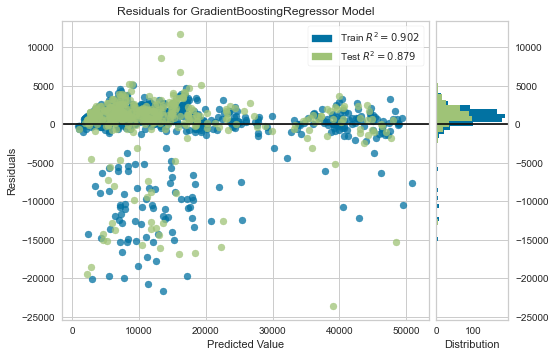

In [17]:
plot_model(gbr)

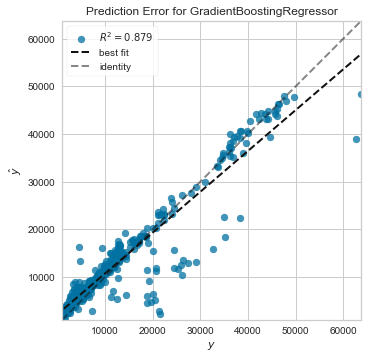

In [18]:
plot_model(gbr, plot = 'error')

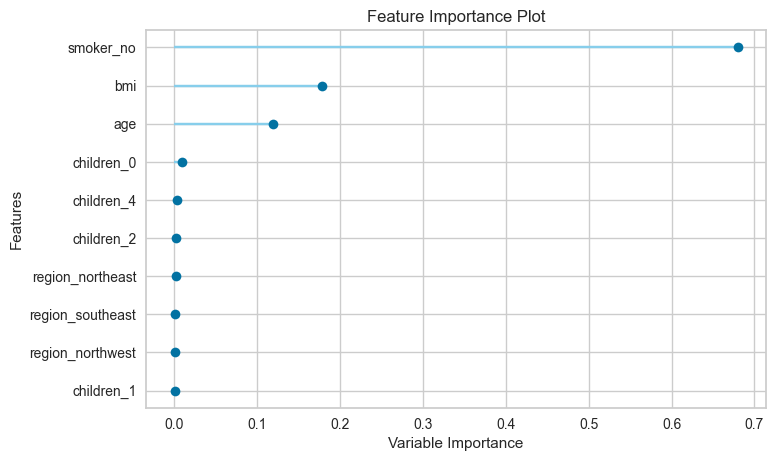

In [19]:
plot_model(gbr, plot='feature')

In [20]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. <b>Interpret Model<b>

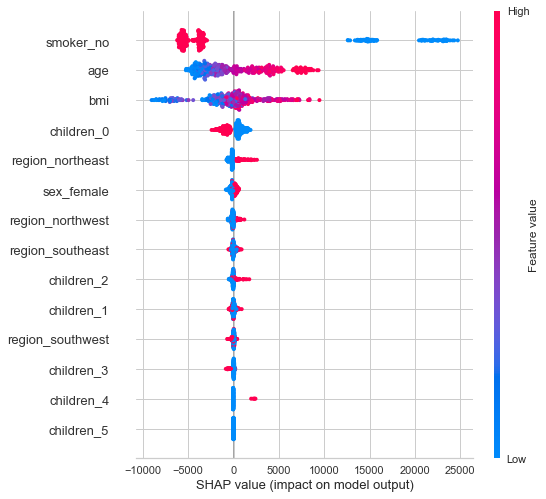

In [21]:
interpret_model(lightgbm)

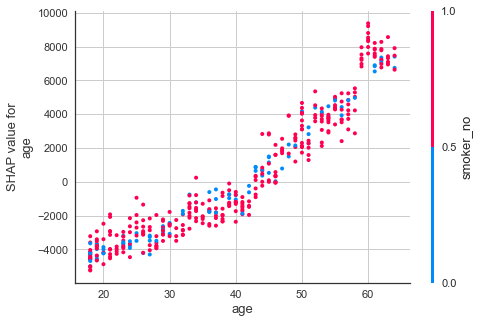

In [22]:
interpret_model(lightgbm, plot = 'correlation')

In [23]:
interpret_model(lightgbm, plot = 'reason', observation=12)

# 11. <b>AutoML()<b>

## Overview of what AutoML() does
There are two types of parameters where hyperparameters are set by the user before starting training and the autoML() chooses not only the best model but also updates model parameters that are learned during the model training.

In [24]:
best = automl(optimize = 'R2')
best

BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                          ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='ls',
                                                          max_depth=3,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
       

# 12.<b> Predict Model<b>

In [25]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts_best = predict_model(best)
pred_holdouts.head()
pred_holdouts_best.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,20686826.5633,4548.2773,0.8552,0.5223,0.3678


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2336.2482,17063673.4679,4130.8200,0.8806,0.3928,0.2867


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9800.888672,10485.334822
1,32.0,37.334999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4667.607422,7357.422427
2,27.0,31.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34838.871094,35506.829520
3,35.0,24.129999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5125.215820,7189.002692
4,60.0,25.740000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12142.578125,15226.792692


In [26]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()
# data.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,18050.877535
1,18,male,33.770,1,no,southeast,4049.824471
2,28,male,33.000,3,no,southeast,5864.344213
3,33,male,22.705,0,no,northwest,7248.236268
4,32,male,28.880,0,no,northwest,3888.259357


# 13. <b>Save / Load Model<b>

In [26]:
save_model(best, model_name='gbr_model_01012023')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                            min_weight_fraction_leaf=0.0,
                                                                            n_estimators=100,
                                                                            n_iter_no_change=None,
              

In [27]:
loaded_bestmodel = load_model('gbr_model_03012022')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                                                           min_weight_fraction_leaf=0.0,
                                                                           n_estimators=100,
                                                                         

# 14. <b>Evaluate Model<b>


In [30]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…